<a href="https://colab.research.google.com/github/ssongplay/Manufacturing-System-lab/blob/main/04_%EB%AF%B8%EC%A0%81%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 수치 미분 개념 (유한 차분)
- 수치 미분은 특정함수의 한 점에서 그 함수와 만나는 접선의 기울기를 구하는 것 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fd(f, x, h=0.001):
  return f(x+h)-f(x)/h

In [3]:
# ex) f(x) = -x^2 + 6x – 6이라는 함수가 있을 때, x = 2에서의 접선 기울기는 ?

x = np.arange(1, 5, 0.01)
def ff(x):
  result = -x**2 + 6*x - 6
  return result

In [4]:
ff(1)

-1

Text(0.5, 1.0, '-x^2 + 6x - 6')

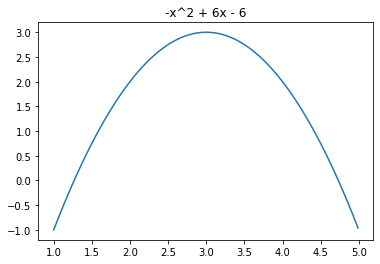

In [5]:
plt.plot(x, ff(x))
plt.title('-x^2 + 6x - 6')

In [6]:
import sympy as sp

In [7]:
x = sp.Symbol('x')
eq = -x**2 + 6*x - 6
diff_eq = sp.diff(eq)
print(diff_eq)

6 - 2*x


In [8]:
from scipy.misc import derivative
def f(x):
  return -x**2 + 6*x - 6
deriv_eq = derivative(f, 2)
print(deriv_eq)

2.0


In [9]:
eq = x**5 - (1/x) + (sp.cos(x))**2
diff_eq = sp.diff(eq, x)   #다변수 함수의 미분 가능
print(diff_eq)

5*x**4 - 2*sin(x)*cos(x) + x**(-2)


In [10]:
x, y = sp.symbols('x y')
f = (x*y)**5 + -1/x**2 + sp.cos(x)**x
print(f)
sp.diff(f, x)

x**5*y**5 + cos(x)**x - 1/x**2


5*x**4*y**5 + (-x*sin(x)/cos(x) + log(cos(x)))*cos(x)**x + 2/x**3

# 적분

In [11]:
# fx = x**2 + 3*x (0, 10) integrate

def f(x):
  x**2 + 3*x

x = sp.Symbol('x')
fx = x**2 + 3*x 
print(fx)

x**2 + 3*x


In [12]:
inte_fx = sp.integrate(fx)
print(inte_fx)

x**3/3 + 3*x**2/2


In [13]:
# 구해진 적분식에 실제 숫자를 넣어서 계산하려면 subs(), evalf() 사용
(inte_fx.subs(x, 10) - inte_fx.subs(x, 0)).evalf()

483.333333333333

In [14]:
def fx(x):
  return x**4 - 10*(x**3) + 15*(x**2) - 6*x + 10

# 여러개의 직사각형을 활용하여 적분하기 (직사각형법)
def inte_square(a, b, n):
  sum = 0
  h = (b-a)/n  # 전체구간 (0~1)을 n개로 나누면 직사각형 밑변의 길이 산출
  for i in range(1, n+1, 1):  
    sum = sum + h*fx(a + i*h)   #오른쪽 직사각형으로 가면서 높이(f(x))와 h를 곱해가며 더함    
  return sum

In [15]:
inte_square(0, 1, 100)

9.700033332999999

In [16]:
# 적분 vs 수치적분
x = sp.Symbol('x')
fx = x**4 - 10*(x**3) + 15*(x**2) - 6*x + 10
inte_fx = sp.integrate(fx)

(inte_fx.subs(x,1) - inte_fx.subs(x,0)).evalf()

9.70000000000000

# 시뮬레이션을 활용한 수치 적분

In [17]:
def fx(x) : return x**2

In [18]:
# x = -2~2, y = 0~4 까지의 영역에서 random으로 데이터 생성
a, b, c, d = [-2, 2, 0, 4]   
x = np.random.uniform(a, b, size=10000)
print(x)
print(len(x))
y = np.random.uniform(c, d, size=10000)
print(y)
print(len(y))

[ 1.67054675 -0.97561938 -1.52731025 ... -0.03602857 -1.05061356
 -1.6926349 ]
10000
[2.91932177 0.78439751 2.5982941  ... 2.29191594 3.87186951 1.10334709]
10000


In [19]:
temp = np.sum(fx(x)>y)/10000  # y값이 f(x)보다 작은 케이스를 전체 케이스에서 나눠줌 (비율 계산)
print(temp)
print(temp * 16)

0.3289
5.2624
